# Tugas Besar Pengolahan Citra Digial
### Memanggil library numpy, opencv, dan matplotlib

In [1]:
import numpy as np #import library numpy
import cv2 #import library opencv
import matplotlib.pyplot as plt #import library matplotlib
import math #import library math digunakan untuk memanggil method / fungsi sqrt()

### Membaca gambar menggunakan library opencv yang nantinya akan dilakukan pengolahan citra

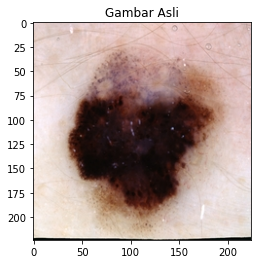

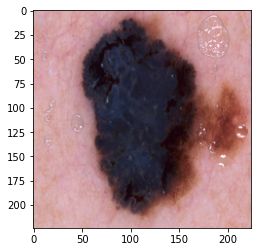

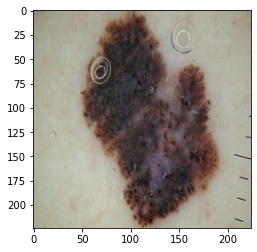

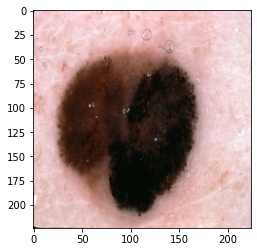

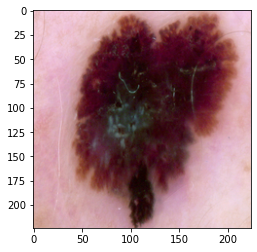

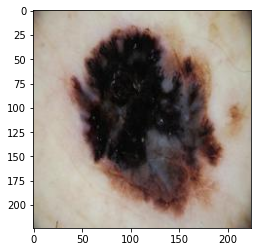

In [11]:
gbr1 = cv2.imread('1.jpg') #Untuk membaca Gambar
gbr2 = cv2.imread('2.jpg')
gbr3 = cv2.imread('3.jpg')
gbr4 = cv2.imread('4.jpg')
gbr5 = cv2.imread('5.jpg')
gbr6 = cv2.imread('6.jpg')

rgb=[]

rgb.append(cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)) #cvtColor untuk mengkonversi gambar dari 1 color space ke color space lainnya
rgb.append(cv2.cvtColor(gbr2, cv2.COLOR_BGR2RGB)) #Color_BGR2RGB untuk mengubah gambar dari yang BGR menjadi RGB, keduanya sama-sama rgb
rgb.append(cv2.cvtColor(gbr3, cv2.COLOR_BGR2RGB)) #Dilakukan pengubahan ke RGB hanya untuk mempermudah, karena default dari OpenCV gambar berwarna dibaca dalam format BGR, walaupun sama-sama RGB
rgb.append(cv2.cvtColor(gbr4, cv2.COLOR_BGR2RGB)) 
rgb.append(cv2.cvtColor(gbr5, cv2.COLOR_BGR2RGB))
rgb.append(cv2.cvtColor(gbr6, cv2.COLOR_BGR2RGB))

plt.title("Gambar Asli") #Memberikan judul untuk gambar
for i in range(0,6):
    plt.imshow(rgb[i]) #Menampilkan data array sebagai gambar
    plt.show() #Menampilkan figure/gambar yang ada pada imshow

### Mengubah gambar menjadi gambar grayscale

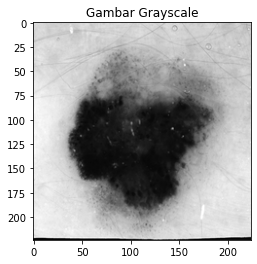

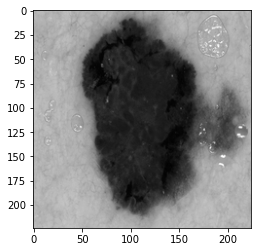

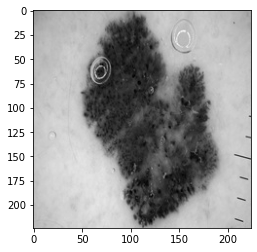

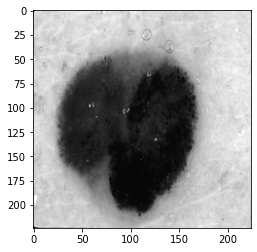

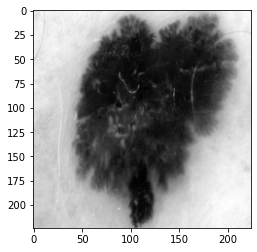

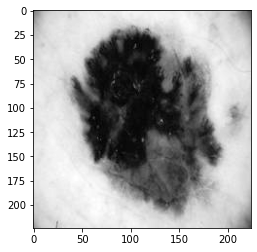

In [13]:
gray=[]
for i in range(0,6):
    gray.append(cv2.cvtColor(rgb[i], cv2.COLOR_RGB2GRAY)) #RGB2GRAY mengubah gambar berwarna menjadi gambar grayscale

plt.title("Gambar Grayscale") 
for i in range(0,6):
    plt.imshow(gray[i],cmap="gray")
    plt.show()


### Melakukan metode pelembutan citra (Image Smoothing)
Dilakukan metode pelembutan citra karena banyaknya bagian yang kasar pada gambar kanker kulit ganas (Skin Cancer Malignant)

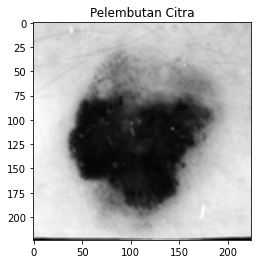

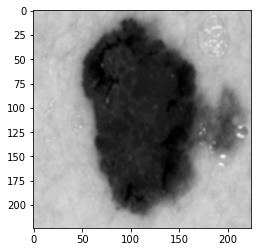

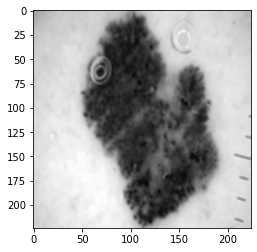

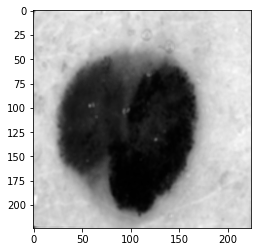

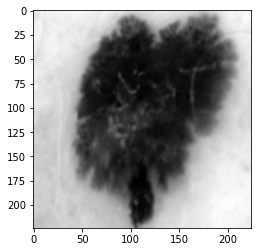

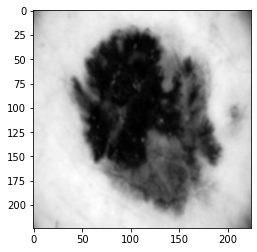

In [14]:
kernelq= np.array([[1/9, 1/9, 1/9], 
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

#Mendeklarasikan array sebagai kernel untuk Pelembutan citra

hpf=[]
for i in range(0,6):
    hpf.append(cv2.filter2D(gray[i], 0, kernelq)) #Untuk melakukan konvolusi dengan kernel filtering

plt.title("Pelembutan Citra")
for i in range(0,6):
    plt.imshow(hpf[i],cmap="gray")
    plt.show()

### Melakukan metode threshing
Dilakukan metode threshing yaitu untuk mengubah gambar grayscale menjadi gambar biner (Hitam dan putih).

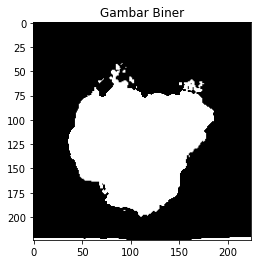

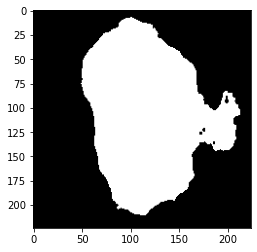

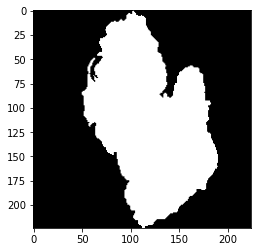

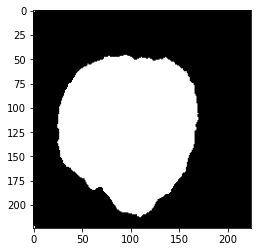

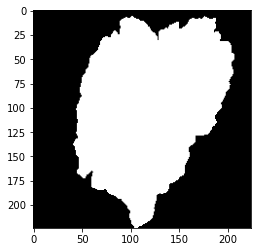

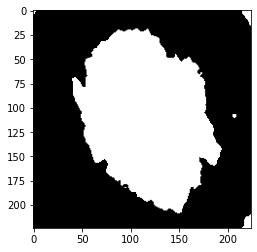

In [16]:
thr=[]
for i in range(0,6):
    ret, rry = cv2.threshold(hpf[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    thr.append(rry)

plt.title("Gambar Biner") 
for i in range(0,6):
    thr[i]=255-thr[i]
    plt.imshow(thr[i],cmap="gray") 
    plt.show()


### Melakukan metode operasi Erosi
Digunakan metode operasi erosi dikarenakan pada bagian kankernya digambar biner terlalu besar daripada gambar aslinya

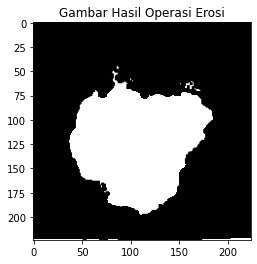

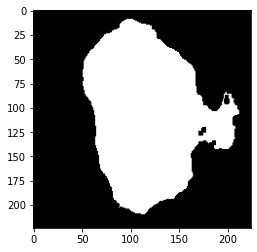

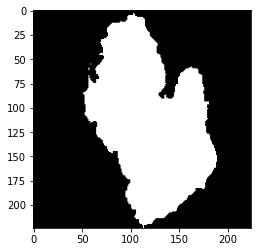

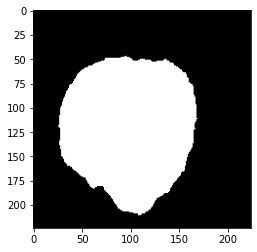

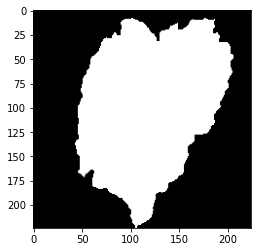

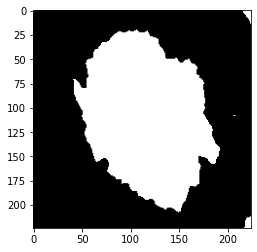

In [17]:
kernel_ero = np.ones((3,3),np.uint8)
ero=[]
for i in range(0,6):
    ero.append(cv2.erode(thr[i],kernel_ero,iterations=1))

plt.title("Gambar Hasil Operasi Erosi") 
for i in range(0,6):    
    plt.imshow(ero[i],cmap="gray") 
    plt.show()

### Melakukan metode operasi Opening
Digunakan metode operasi opening yaitu operasi erosi diikuti dengan operasi dilasi, operasi opening dilakukan untuk 
menghilangkan objek-objek kecil atau dapat dibilang memperhalus batas pada bagian kanker kulit ganas (Skin Cancer Malignant)

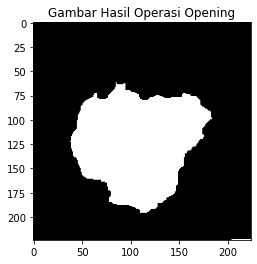

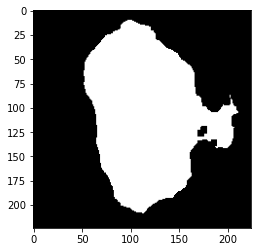

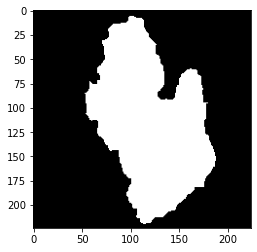

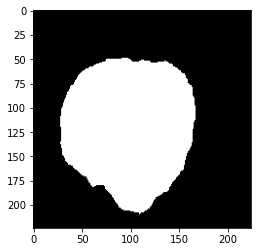

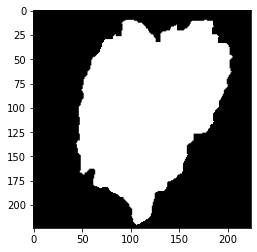

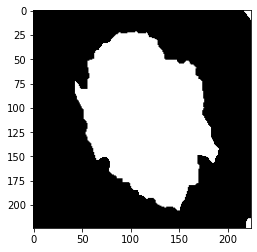

In [18]:
kernel_dil = np.ones((3,3),np.uint8) #np.uint8 memberikan array tersebut data tipe berupa int 8 bit, dengan nilai maksimal 127 dan minimum -128
dil=[]
for i in range(0,6):
    dil.append(cv2.erode(ero[i],kernel_dil,iterations=1))

plt.title("Gambar Hasil Operasi Opening") 
for i in range(0,6):
    plt.imshow(dil[i],cmap="gray") 
    plt.show()

### Melakukan metode Deteksi Tepi (Edge Detection)
Digunakan metode deteksi tepi untuk melihat pinggiran/tepi dari gambar kanker kulit ganas (Skin Cancer Malignant)

In [20]:
#Membuat fungsi/method untuk deteksi tepi menggunakan operasi Prewitt
def prewitt(rgb):
    gray= rgb 
    height=np.size(rgb,0) 
    width=np.size(rgb,1) 
    
    sx  = np.array([[-1,0,1],  
                    [-1,0,1],
                    [-1,0,1]])
    
    sy  = np.array([[1,1,1], 
                    [0,0,0],
                    [-1,-1,-1]])
    
    zxc=3 
    pad=zxc-1 
    jarak=int(pad/2) 

    tampung=np.zeros(gray.shape) 
    low = np.zeros((height+pad,width+pad))

    for i in range(height):
        for y in range(width):
            low[i+jarak,y+jarak]=gray[i,y] 

    for i in range (height):
        for y in range(width):
            nSx=0 
            nSy=0 
            
            for q in range(zxc):
                for w in range(zxc):
                    nSx+=low[i+q,y+w]*sx[q,w] 
                    nSx+=low[i+q,y+w]*sy[q,w]
                    
            hasil=round(math.sqrt((nSx**2)+(nSy**2))) 
            tampung[i,y]=hasil
    
    plt.imshow(tampung,cmap="gray") 
    plt.show()

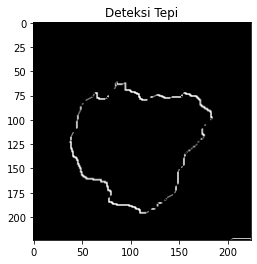

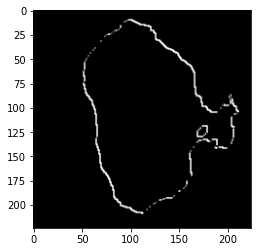

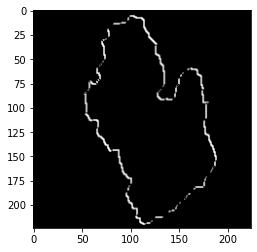

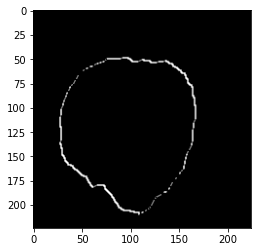

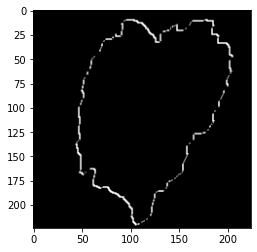

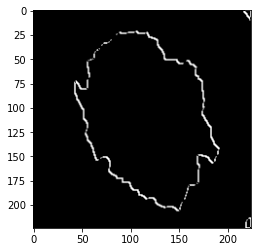

In [21]:
plt.title("Deteksi Tepi")
for i in range(0,6):
    prewitt(dil[i])

## Thank you!!!